In [3]:
#importing needed packages
%matplotlib inline
from matplotlib import pyplot as plt
#import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab

In [4]:
#data set
df=pd.read_csv('cardio_dataset.csv')

In [5]:
#Print the columns and rows numbers of the data set
print('This data set has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

This data set has 6644 rows and 9 columns.


In [6]:
df.head(5)

,SEX,AGE,TC(mg/dL),HDL(mg/dL),SBP(mm Hg),SMOKE,BPMED,DIAB,RISKLEVEL
0,2,48,236,66,131,0,2,0,1.1
1,1,48,260,51,120,0,2,1,7.0
2,1,44,187,49,133,1,2,0,7.0
3,2,42,216,57,100,1,2,0,0.4
4,2,56,156,42,128,0,2,0,2.2


# Description of Features

    
    SEX   1/male     2/female
    AGE   years
    TC    mg/dL range (130-220) 
    HDL   mg/dL range (20-100)
    SBP   mm Hg range (90-200)
    SMOKE 1/smoker   0/non-smoker
    BPMED 1/yes      2/no 
    DIAB  1/diabetic 0/non-diabetic


In [7]:
df.describe()

,SEX,AGE,TC(mg/dL),HDL(mg/dL),SBP(mm Hg),SMOKE,BPMED,DIAB,RISKLEVEL
count,6644.000000,6644.000000,6644.000000,6644.000000,6644.000000,6644.000000,6644.000000,6644.000000,6644.000000
mean,1.521975,56.645695,217.412703,51.081276,131.303733,0.304636,1.788380,0.169777,12.670334
std,0.499554,11.380015,43.842149,16.324231,19.207829,0.460288,0.408487,0.375465,12.997543
min,1.000000,40.000000,59.000000,12.000000,80.000000,0.000000,1.000000,0.000000,0.100000
25%,1.000000,46.000000,188.000000,40.000000,118.000000,0.000000,2.000000,0.000000,2.800000
50%,2.000000,56.000000,214.000000,48.000000,129.000000,0.000000,2.000000,0.000000,8.100000
75%,2.000000,66.000000,243.000000,59.000000,142.000000,1.000000,2.000000,0.000000,18.600000
max,2.000000,79.000000,501.000000,196.000000,244.000000,1.000000,2.000000,1.000000,85.400000


In [8]:
#min and max Risk level percentage in data set
min=df.RISKLEVEL.min()
max=df.RISKLEVEL.max()
print('Minimum Risk Level:',min,'%')
print('Maximum Risk Level:',max,'%')


Minimum Risk Level: 0.1 %
Maximum Risk Level: 85.4 %


In [9]:
#converting into a numpy array
df=df.as_matrix() 

In [10]:
data=df[:,0:8]
target=df[:,8]

print(target)

[ 1.1  7.   7.  ... 30.6 23.8  1. ]


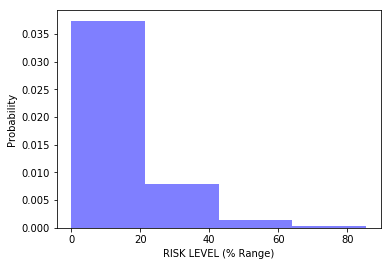

In [11]:
# example data
mu = 100 # mean of distribution

num_bins = 4
x=target
# the histogram of the data
n, bins, patches = plt.hist(x, num_bins, normed=1, facecolor='blue', alpha=0.5)

plt.xlabel('RISK LEVEL (% Range)')
plt.ylabel('Probability')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

# Splitting Original Data set into Train set and Test set

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np

target=np.reshape(target, (-1,1))
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
scaler_x.fit(data)
scaler_y.fit(target)
xscale=scaler_x.transform(data)
yscale=scaler_y.transform(target)

train_data, test_data, train_target, test_target = train_test_split(xscale, yscale,test_size=0.3)

# Feedforward Neural Network Model

In [13]:
import keras.models as models
import keras.layers as layers
import keras.optimizers as optimizers
from keras.layers import Dropout
import numpy as np

model = models.Sequential()
model.add(layers.Dense(128, input_dim=8, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='linear'))


model.compile(optimizer='adam',loss='mse',metrics=['mse','mae'])

model.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1152      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
_________________________________________________________________
dense_4 (Dense)      

In [14]:
history=model.fit(train_data,train_target,epochs=200,validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 3720 samples, validate on 930 samples
Epoch 1/200
3720/3720 [==============================] - 2s 538us/step - loss: 0.0089 - mean_squared_error: 0.0089 - mean_absolute_error: 0.0619 - val_loss: 0.0025 - val_mean_squared_error: 0.0025 - val_mean_absolute_error: 0.0311
Epoch 2/200
3720/3720 [==============================] - 0s 68us/step - loss: 0.0038 - mean_squared_error: 0.0038 - mean_absolute_error: 0.0388 - val_loss: 0.0019 - val_mean_squared_error: 0.0019 - val_mean_absolute_error: 0.0264
Epoch 3/200
3720/3720 [==============================] - 0s 71us/step - loss: 0.0032 - mean_squared_error: 0.0032 - mean_absolute_error: 0.0350 - val_loss: 0.0022 - val_mean_squared_error: 0.0022 - val_mean_absolute_error: 0.0296
Epoch 4/200
3720/3720 [==============================] - 0s 70us/step - loss: 0.0029 - mean_squared_error: 0.0029 - mean_absolute_error: 0.0330 - val_loss: 0.0015 - val_mean_squared_error: 0.0015 - val_mean_absolut

Epoch 70/200
3720/3720 [==============================] - 0s 66us/step - loss: 0.0013 - mean_squared_error: 0.0013 - mean_absolute_error: 0.0223 - val_loss: 0.0015 - val_mean_squared_error: 0.0015 - val_mean_absolute_error: 0.0221
Epoch 71/200
3720/3720 [==============================] - 0s 61us/step - loss: 0.0015 - mean_squared_error: 0.0015 - mean_absolute_error: 0.0238 - val_loss: 0.0013 - val_mean_squared_error: 0.0013 - val_mean_absolute_error: 0.0219
Epoch 72/200
3720/3720 [==============================] - 0s 63us/step - loss: 0.0014 - mean_squared_error: 0.0014 - mean_absolute_error: 0.0229 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0201
Epoch 73/200
3720/3720 [==============================] - 0s 58us/step - loss: 0.0013 - mean_squared_error: 0.0013 - mean_absolute_error: 0.0225 - val_loss: 0.0013 - val_mean_squared_error: 0.0013 - val_mean_absolute_error: 0.0204
Epoch 74/200
3720/3720 [==============================] - 0s 57us/step - los

3720/3720 [==============================] - 0s 58us/step - loss: 0.0012 - mean_squared_error: 0.0012 - mean_absolute_error: 0.0207 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0189
Epoch 141/200
3720/3720 [==============================] - 0s 61us/step - loss: 0.0011 - mean_squared_error: 0.0011 - mean_absolute_error: 0.0202 - val_loss: 0.0013 - val_mean_squared_error: 0.0013 - val_mean_absolute_error: 0.0219
Epoch 142/200
3720/3720 [==============================] - 0s 63us/step - loss: 0.0012 - mean_squared_error: 0.0012 - mean_absolute_error: 0.0212 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0179
Epoch 143/200
3720/3720 [==============================] - 0s 61us/step - loss: 0.0012 - mean_squared_error: 0.0012 - mean_absolute_error: 0.0207 - val_loss: 0.0013 - val_mean_squared_error: 0.0013 - val_mean_absolute_error: 0.0204
Epoch 144/200
3720/3720 [==============================] - 0s 59us/step - loss: 0.0011

3720/3720 [==============================] - 0s 75us/step - loss: 0.0011 - mean_squared_error: 0.0011 - mean_absolute_error: 0.0203 - val_loss: 0.0013 - val_mean_squared_error: 0.0013 - val_mean_absolute_error: 0.0208
Epoch 176/200
3720/3720 [==============================] - 0s 77us/step - loss: 0.0011 - mean_squared_error: 0.0011 - mean_absolute_error: 0.0203 - val_loss: 0.0014 - val_mean_squared_error: 0.0014 - val_mean_absolute_error: 0.0250
Epoch 177/200
3720/3720 [==============================] - 0s 90us/step - loss: 9.9936e-04 - mean_squared_error: 9.9936e-04 - mean_absolute_error: 0.0195 - val_loss: 0.0014 - val_mean_squared_error: 0.0014 - val_mean_absolute_error: 0.0207
Epoch 178/200
3720/3720 [==============================] - 0s 77us/step - loss: 0.0011 - mean_squared_error: 0.0011 - mean_absolute_error: 0.0203 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0198
Epoch 179/200
3720/3720 [==============================] - 0s 77us/step - loss

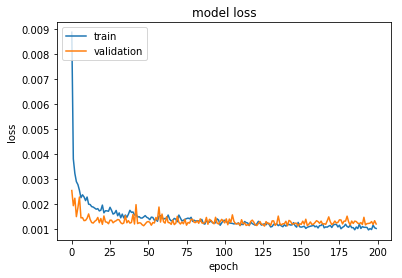

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Predictions 

In [16]:
result=model.predict([[test_data[0]]])
actual = scaler_y.inverse_transform([test_target[0]]) 
predicted = scaler_y.inverse_transform(result)

print('Actual Result:',actual)
print('Predicted Result:',predicted)


Actual Result: [[1.5]]
Predicted Result: [[2.2006855]]


In [17]:
my_test_data=[1,48,260,51,120,0,2,1]
my_test_data=scaler_x.transform([my_test_data])
result=model.predict(my_test_data)
actual=7
predicted = scaler_y.inverse_transform(result)

print('Actual Result:',actual)
print('Predicted Result:',predicted)


Actual Result: 7
Predicted Result: [[8.593008]]


# R2 Score

In [18]:
from sklearn.metrics import r2_score

results=model.predict(test_data)

r2=r2_score(test_target,results)
print('r2 score:',r2)



r2 score: 0.9555934508486292


In [19]:
model.save('./Predictions.h5')